## New Summarizer experiments1

What I need to do

- Retrieve the today news, article from the scrapper database.

- Summarize them with good prompt.

- display them on a UI.

In [1]:
%load_ext dotenv

In [2]:
%dotenv ./.env_prod -o

In [3]:
from src.rag.shared.database import execute_query, generate_database_connection

In [4]:
yesterday_article_query = "select content, title, posted_at,url from article where posted_at::date = CURRENT_DATE - interval '1 day'"

In [5]:
from os import getenv

In [6]:
database_user = getenv('POSTGRES_USER')
database_password = getenv('POSTGRES_PASSWORD')
database_host = getenv('POSTGRES_HOST')
database_port = getenv('POSTGRES_PORT')
database_name = getenv('POSTGRES_DB')

In [7]:
database_credentials = {
    'user': database_user,
    'password': database_password,
    'host': database_host,
    'port': database_port,
    'database': database_name
}

In [8]:
connection = generate_database_connection(database_crendentials=database_credentials)

In [9]:
connection

<connection object at 0x106284040; dsn: 'user=esp_py password=xxx dbname=congo_news_db host=107.173.6.77 port=5434', closed: 0>

In [10]:
results =execute_query(query=yesterday_article_query, database_connection=connection)

In [11]:
results[0].url

'https://actu30.cd/2024/10/lomami-deux-morts-et-plusieurs-blesses-dans-un-accident-de-la-route-sur-laxe-mwene-ditu-luputa/'

In [12]:
import pandas as pd

In [13]:
results_df = pd.DataFrame.from_records(results)

In [14]:
results_df.columns = ["content", "title", "posted_at", "url"]

In [15]:
from pathlib import Path

In [16]:
current_directory = Path.cwd().joinpath("datasets", "today_news")

In [17]:
current_directory.mkdir(exist_ok=True)

In [18]:
from datetime import datetime

In [19]:
today = datetime.now().strftime("%Y-%m-%d")

In [20]:
results_df.to_csv(current_directory.joinpath(f"{today}-news.csv"))

In [21]:
results_df.content

0     Il s’agit d’un gros véhicule Howo en provenanc...
1     Les Léopards de la Rd-Congo affronteront les T...
2     Accompagné de quelques députés et sénateurs, l...
3     Le procureur de la Cour pénale internationale,...
4     Le gouvernement sénégalais a présenté ce lundi...
                            ...                        
82    Cet événement a coïncidé avec la double commém...
83    Selon le communiqué final de cette réunion, le...
84    C’est l’administrateur du territoire de Djugu ...
85    Le chargé de communication et sensibilisation ...
86    Trois combattants des Forces démocratiques all...
Name: content, Length: 87, dtype: object

In [22]:
results_df = results_df.drop_duplicates(subset="content")

In [23]:
results_df.head()

,content,title,posted_at,url
0,Il s’agit d’un gros véhicule Howo en provenanc...,Lomami : deux morts et plusieurs blessés dans ...,2024-10-14 16:24:53,https://actu30.cd/2024/10/lomami-deux-morts-et...
1,Les Léopards de la Rd-Congo affronteront les T...,Eliminatoires CAN 2025 / Tanzanie vs RDC : « O...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
2,"Accompagné de quelques députés et sénateurs, l...",À la 149ème Assemblée de l'Union inter-parleme...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
3,"Le procureur de la Cour pénale internationale,...",Urgent : la CPI réactive ses enquêtes sur les ...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
4,Le gouvernement sénégalais a présenté ce lundi...,Sénégal : le gouvernement présente un vaste pl...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...


In [24]:
results_df = results_df.reset_index(drop=True)

In [25]:
results_df

,content,title,posted_at,url
0,Il s’agit d’un gros véhicule Howo en provenanc...,Lomami : deux morts et plusieurs blessés dans ...,2024-10-14 16:24:53,https://actu30.cd/2024/10/lomami-deux-morts-et...
1,Les Léopards de la Rd-Congo affronteront les T...,Eliminatoires CAN 2025 / Tanzanie vs RDC : « O...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
2,"Accompagné de quelques députés et sénateurs, l...",À la 149ème Assemblée de l'Union inter-parleme...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
3,"Le procureur de la Cour pénale internationale,...",Urgent : la CPI réactive ses enquêtes sur les ...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
4,Le gouvernement sénégalais a présenté ce lundi...,Sénégal : le gouvernement présente un vaste pl...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...
...,...,...,...,...
79,Cet événement a coïncidé avec la double commém...,"À Nkamba, Daniel Bumba appelle à prier pour l’...",2024-10-14 03:56:35,https://actu30.cd/2024/10/a-nkamba-daniel-bumb...
80,"Selon le communiqué final de cette réunion, le...",Processus de Luanda : la RDC et le Rwanda s’ac...,2024-10-14 05:37:26,https://actu30.cd/2024/10/processus-de-luanda-...
81,C’est l’administrateur du territoire de Djugu ...,Deux militaires tués par des hommes armés à Djugu,2024-10-14 05:58:03,https://actu30.cd/2024/10/deux-militaires-tues...
82,Le chargé de communication et sensibilisation ...,Lubero : 3 rebelles ADF tués par la coalition ...,2024-10-14 05:52:37,https://actu30.cd/2024/10/lubero-3-rebelles-ad...


In [26]:
from src.rag.components.generator import LLamaCppGeneratorComponent

/Users/esp.py/Projects/Personal/end-to-end-rag/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


prompting doesn't seem to wokr, let us use clustering and prompting.

The step will be computing the embedding of the documents, and then cluster the document. Then for each cluster of documents, we will generate a summary.

embedding_model_id = "dunzhang/stella_en_400M_v5"

In [31]:
embedding_model_id = "dunzhang/stella_en_400M_v5"

In [32]:
from pathlib import Path

In [33]:
model_path = Path.cwd().joinpath("models")

In [34]:
embedding_model_path = model_path.joinpath(embedding_model_id)

In [35]:

transformer_kwargs = {"model_name_or_path": embedding_model_path.__str__(),
                      "trust_remote_code": True,
                      "device": "cpu",
                      "config_kwargs": {"use_memory_efficient_attention": False,
                                        "unpad_inputs": False},
                      "cache_folder": model_path}

In [36]:
from sentence_transformers import SentenceTransformer

In [37]:
sentence_transformer_model = SentenceTransformer(
    **transformer_kwargs)

Some weights of the model checkpoint at /Users/esp.py/Projects/Personal/end-to-end-rag/models/dunzhang/stella_en_400M_v5 were not used when initializing NewModel: ['new.pooler.dense.bias', 'new.pooler.dense.weight']
- This IS expected if you are initializing NewModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing NewModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
today_news_embeddings = sentence_transformer_model.encode(
    results_df.content.tolist())

/Users/esp.py/Projects/Personal/end-to-end-rag/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py:1141: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Not just clustering but let start with paragraph spliting and then embedding.

In [70]:
today_news_embeddings

array([[-0.4820006 ,  0.02336845, -0.5437746 , ...,  0.10597923,
         0.33444557,  0.3791698 ],
       [-0.6060782 , -0.04309595, -0.6395918 , ...,  0.39404675,
         0.2783442 , -0.92615753],
       [ 0.1494045 ,  0.06794187, -0.8322147 , ...,  0.43574128,
         0.6172848 ,  0.2919908 ],
       ...,
       [-0.7862015 ,  0.19975415, -1.5908132 , ..., -0.30467385,
        -0.18797877,  0.10968665],
       [ 0.08682243, -0.25162956, -0.65960604, ..., -0.09986489,
         0.06282356,  0.27322528],
       [ 0.00446194,  0.75498545, -2.179459  , ..., -0.29409176,
         0.6102005 ,  0.0094057 ]], dtype=float32)

In [39]:
today_news_embeddings.shape

(84, 1024)

In [40]:
from sklearn.cluster import KMeans

In [41]:
import matplotlib.pyplot as plt

In [42]:
axes = plt.figure(figsize=(5, 10))

<Figure size 500x1000 with 0 Axes>

In [43]:
similarities = sentence_transformer_model.similarity(today_news_embeddings, today_news_embeddings)

In [44]:
import seaborn as sb

In [45]:
#plt.figure(figsize=(50, 50))
#sb.heatmap(similarities, cmap="Blues", annot=True)

In [46]:
results_df.iloc[25]

content      L'Organisation mondiale de la Santé (OMS) a fr...
title        Mpox : l'OMS approuve un vaccin pour les adole...
posted_at                                  2024-10-14 00:00:00
url          https://www.mediacongo.net/article-actualite-1...
Name: 25, dtype: object

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score

In [67]:
def find_best_estimator (X):
    K_mean_estimators = [
        (f"KMeans_{i}", KMeans(n_clusters=i, random_state=42, max_iter=3000)) for i in range(3, X.shape[0])]
    scores = []

    best_estimator = None
    best_metric = float("-inf")
    for estimator_name, estimator in K_mean_estimators :
        estimator.fit(X)
        labels = estimator.labels_
        score = silhouette_score(
            X, labels)
        if score > best_metric :
            best_metric = score
            best_estimator = estimator
        print(estimator_name, score)
        scores.append(score)
    return best_estimator, scores

In [68]:
best_estimator, scores = find_best_estimator(today_news_embeddings)

KMeans_3 0.036040705
KMeans_4 0.07274605
KMeans_5 0.06260349
KMeans_6 0.05918769
KMeans_7 0.06568891
KMeans_8 0.06289819
KMeans_9 0.061266117
KMeans_10 0.06190895
KMeans_11 0.071404256
KMeans_12 0.08238934
KMeans_13 0.08901564
KMeans_14 0.09000916
KMeans_15 0.09256746
KMeans_16 0.10520876
KMeans_17 0.10926188
KMeans_18 0.1023944
KMeans_19 0.09309222
KMeans_20 0.0900941
KMeans_21 0.11271521
KMeans_22 0.11507741
KMeans_23 0.118448086
KMeans_24 0.118499555
KMeans_25 0.120120004
KMeans_26 0.12464226
KMeans_27 0.121260494
KMeans_28 0.123208985
KMeans_29 0.12878102
KMeans_30 0.1328297
KMeans_31 0.13454585
KMeans_32 0.12712568
KMeans_33 0.12852223
KMeans_34 0.13140887
KMeans_35 0.135113
KMeans_36 0.136845
KMeans_37 0.13403058
KMeans_38 0.13407114
KMeans_39 0.13617338
KMeans_40 0.13780507
KMeans_41 0.13669527
KMeans_42 0.13468646
KMeans_43 0.13951433
KMeans_44 0.13690956
KMeans_45 0.13662912
KMeans_46 0.13485773
KMeans_47 0.13269965
KMeans_48 0.1333308
KMeans_49 0.13393068
KMeans_50 0.13663547

In [69]:
axes = plt.figure(figsize=(5, 10))

<Figure size 500x1000 with 0 Axes>

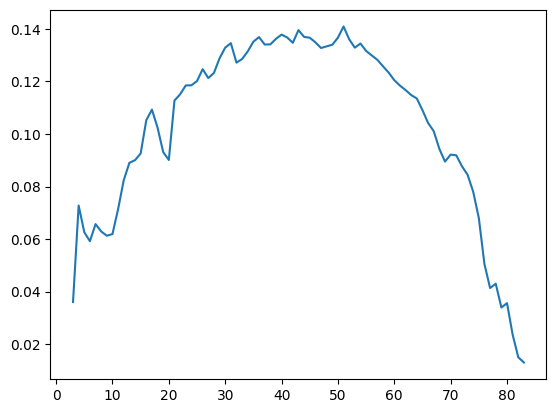

In [71]:
fig, ax = plt.subplots()
ax.plot(range(3, today_news_embeddings.shape[0]), scores)
ax.set_xlabel("number of clusters")
ax.set_ylabel("silhouette score")
ax.set_title("silhouette score vs number of clusters")

In [72]:
def analyse_embeddings(dataframe, embeddings, index, label_column="labels"):
    """ take an matrix of embeddings, and the labels.
    for each label compute the cosine similarity of document with that label.
    """
    document_in_index = dataframe.query(f"{label_column} == {index}")
    with pd.option_context('display.max_colwidth', None):
        display(document_in_index.title)
    document_index = document_in_index.index
    vectors = embeddings[document_index]
    return sentence_transformer_model.similarity(vectors,  vectors)

In [73]:
best_estimator.n_clusters

51

In [74]:
results_df["labels"] = best_estimator.labels_

In [127]:
analyse_embeddings(results_df, today_news_embeddings,50)

8     Insécurité dans l'Est : la RDC renforce sa coopération militaire avec l'Ouganda et reçoit un message particulier du Congo-Brazzaville !
33                    Le représentant spécial de l’UE pour la région des Grands lacs quitte Kinshasa sans avoir rencontrer Felix Tshisekedi !
Name: title, dtype: object

tensor([[1.0000, 0.7135],
        [0.7135, 1.0000]])

Actually I just found out that Kmean is good at clustering document, my documents seems to be very noisy, there are a lot of clusters with 1 or 2 documents, and after going through each cluster separately I found that most of the document make sense.

PCA and then clustering

In [128]:
from sklearn.decomposition import PCA

In [129]:
pca_model = PCA(n_components=today_news_embeddings.shape[0])

In [130]:
reduced_embeddings = pca_model.fit_transform(today_news_embeddings)

In [131]:
reduced_embeddings.shape

(84, 84)

In [132]:
pca_estimator = find_best_estimator(reduced_embeddings)[0]

KMeans_3 0.03604067
KMeans_4 0.07274603
KMeans_5 0.06260348
KMeans_6 0.059187703
KMeans_7 0.065688916
KMeans_8 0.06289819
KMeans_9 0.061266106
KMeans_10 0.061908953
KMeans_11 0.071404256
KMeans_12 0.082389355
KMeans_13 0.08901565
KMeans_14 0.09000917
KMeans_15 0.09256746
KMeans_16 0.10520877
KMeans_17 0.10926186
KMeans_18 0.1023944
KMeans_19 0.09309222
KMeans_20 0.090094104
KMeans_21 0.11271518
KMeans_22 0.11507739
KMeans_23 0.118448086
KMeans_24 0.11849953
KMeans_25 0.12011999
KMeans_26 0.12464224
KMeans_27 0.12126047
KMeans_28 0.123208985
KMeans_29 0.128781
KMeans_30 0.13282968
KMeans_31 0.13454583
KMeans_32 0.12712565
KMeans_33 0.1285222
KMeans_34 0.13140884
KMeans_35 0.13511296
KMeans_36 0.13684495
KMeans_37 0.13403052
KMeans_38 0.1340711
KMeans_39 0.13617334
KMeans_40 0.13780506
KMeans_41 0.13669527
KMeans_42 0.13468646
KMeans_43 0.13951434
KMeans_44 0.13690959
KMeans_45 0.13662913
KMeans_46 0.13485773
KMeans_47 0.13269967
KMeans_48 0.13333082
KMeans_49 0.1339307
KMeans_50 0.13663

In [134]:
pca_estimator.n_clusters

51

In [135]:
pca_estimator.labels_

array([26,  2, 41, 12, 29, 16, 42, 49, 50,  2,  5, 23,  5, 48, 47, 35, 25,
        4, 32, 37,  7, 21,  9, 17,  4, 45, 13, 27, 28,  9, 31,  0, 36, 50,
        8, 15,  5, 20,  6,  9,  6, 19, 24, 12, 30, 30, 11,  2, 18,  2, 10,
       34,  4,  9, 33, 15,  2, 10, 13, 43, 25,  1, 22, 14, 12, 44,  1,  9,
       14, 38,  2, 40, 22, 11, 46, 39,  9, 34,  7, 10,  5,  3, 39, 31],
      dtype=int32)

In [136]:
best_estimator.labels_

array([26,  2, 41, 12, 29, 16, 42, 49, 50,  2,  5, 23,  5, 48, 47, 35, 25,
        4, 32, 37,  7, 21,  9, 17,  4, 45, 13, 27, 28,  9, 31,  0, 36, 50,
        8, 15,  5, 20,  6,  9,  6, 19, 24, 12, 30, 30, 11,  2, 18,  2, 10,
       34,  4,  9, 33, 15,  2, 10, 13, 43, 25,  1, 22, 14, 12, 44,  1,  9,
       14, 38,  2, 40, 22, 11, 46, 39,  9, 34,  7, 10,  5,  3, 39, 31],
      dtype=int32)

In [137]:
results_df["labels_pca"] = pca_estimator.labels_

In [138]:
results_df.loc[results_df.labels_pca != results_df.labels]

,content,title,posted_at,url,labels,labels_pca


In [139]:
analyse_embeddings(results_df, reduced_embeddings, 3, "labels_pca")

81    Deux militaires tués par des hommes armés à Djugu
Name: title, dtype: object

tensor([[1.0000]])

### Applying Hiearchical clustering

We can see that our clusters are good and the first step we were able to separate document, let now try hiearchical clustering to check if there are cluster that can be merged together.

In [140]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

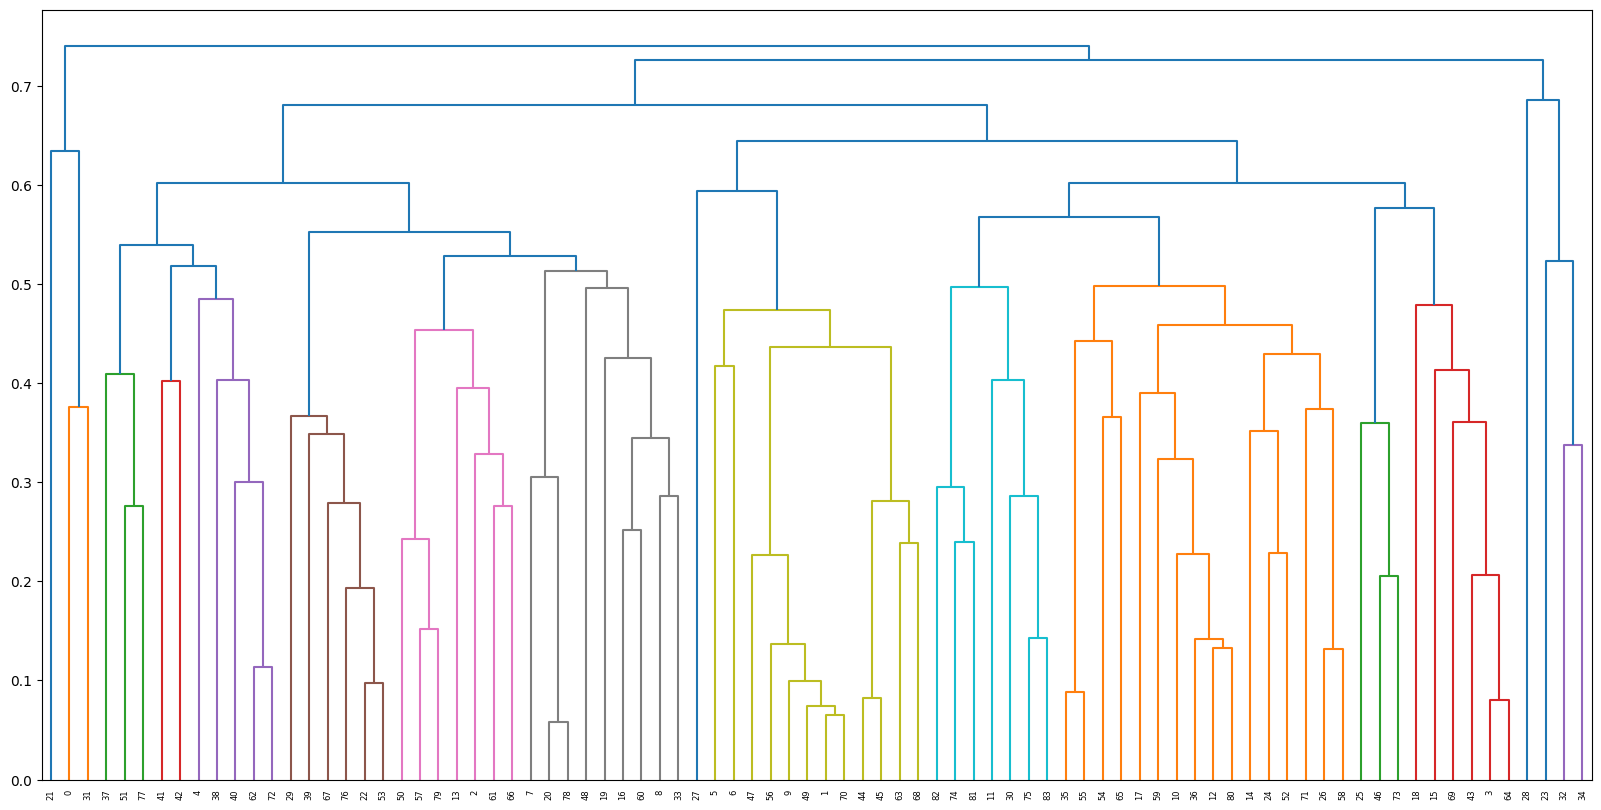

In [143]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(today_news_embeddings,
                   method='complete', metric='cosine')
dendrogram(mergings)
plt.show()

Also, I found out the dentogram method is working, I will use this post to learn more about it.



https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

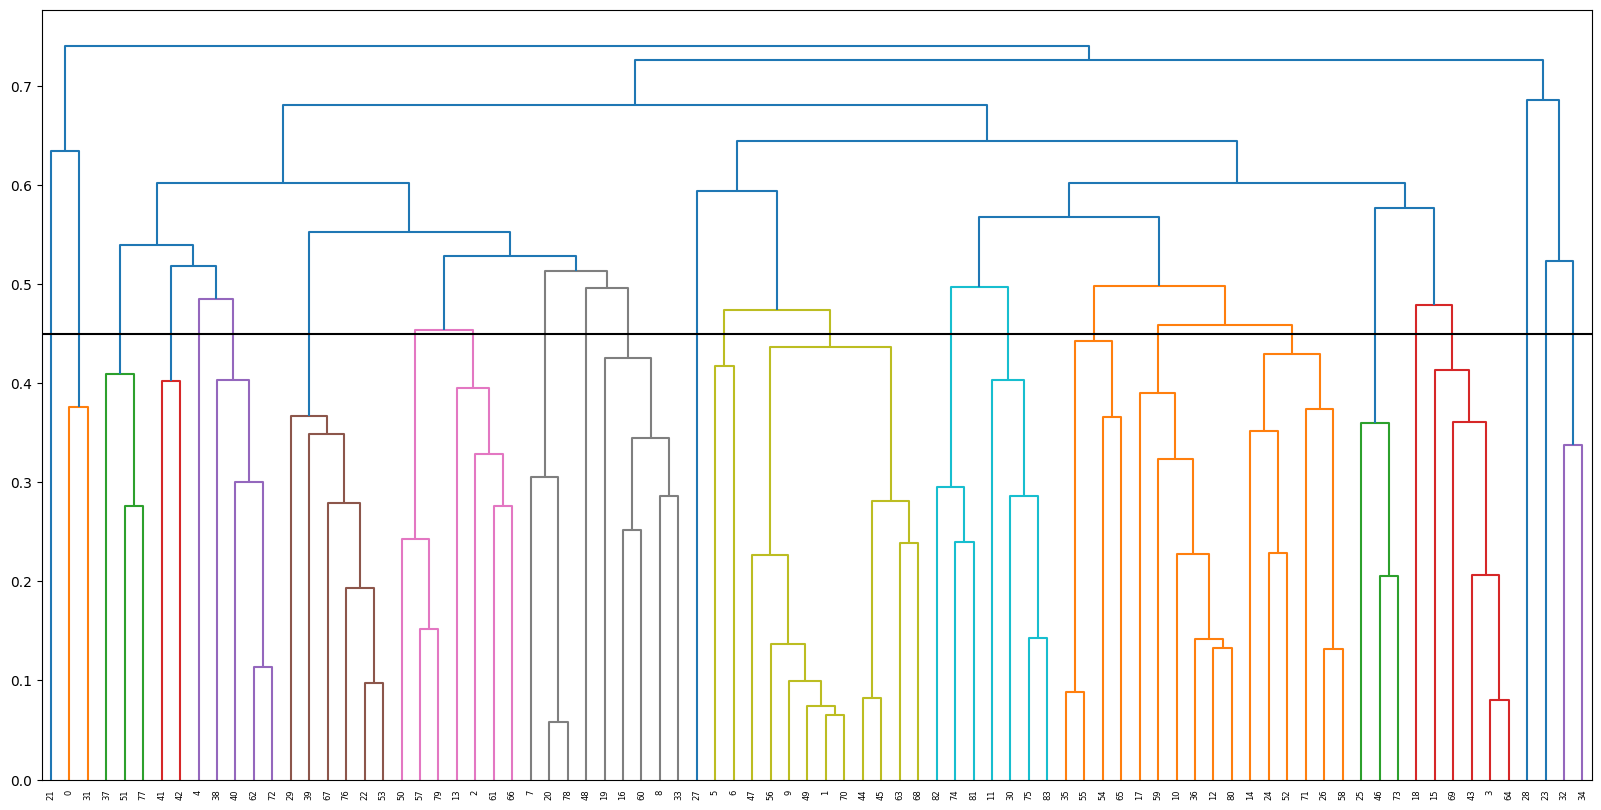

In [182]:
# Complete Linkage
plt.figure(figsize=(20, 10))
mergings = linkage(today_news_embeddings,
                   method='complete', metric='cosine')
dendrogram(mergings)
plt.axhline(y=0.45, c='k')
plt.show()

In [184]:
mergings.shape

(83, 4)

In [185]:
from scipy.cluster.hierarchy import fcluster

label_hierarchical = fcluster(mergings, 0.45, criterion="distance")

In [180]:
import numpy as np

In [159]:
results_df.iloc[[20, 78, 7]]

,content,title,posted_at,url,labels,labels_pca
20,Les enseignants des écoles publiques de la pro...,Maniema : vers la fin de la grève dans les éco...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...,7,7
78,Cette décision a été prise à l’issue de l’asse...,Maniema/Éducation : les enseignants des écoles...,2024-10-14 06:02:42,https://actu30.cd/2024/10/maniema-education-le...,7,7
7,Cela fait exactement 43 jours que les cours ne...,Enseignement public : Steve Mbikayi craint une...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...,49,49


Need to comeback and explore hiearchical clustering

In [186]:
results_df["labels_hierachical"] = label_hierarchical

In [214]:
results_df.query("labels_hierachical==22")

,content,title,posted_at,url,labels,labels_pca,labels_hierachical
3,"Le procureur de la Cour pénale internationale,...",Urgent : la CPI réactive ses enquêtes sur les ...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...,12,12,22
15,Dix ans de prison ferme et une arrestation imm...,Enfants volés en RD Congo et adoptés en Belgiq...,2024-10-14 00:00:00,https://www.mediacongo.net/article-actualite-1...,35,35,22
43,Le bureau procureur de la CPI souligne que « p...,Est de la RDC : la CPI réactive ses enquêtes s...,2024-10-14 15:42:11,https://actu30.cd/2024/10/est-de-la-rdc-la-cpi...,12,12,22
64,La Cour pénale internationale (CPI) a annoncé ...,La CPI réactive les enquêtes sur les crimes au...,2024-10-14 17:19:00,https://actualite.cd/index.php/2024/10/14/la-c...,12,12,22
69,"Le gouvernement congolais, à travers le minist...",Caricature : la RDC à l’ère du désengorgement ...,2024-10-14 13:00:00,https://actualite.cd/index.php/2024/10/14/cari...,38,38,22


Let now find a way to select the best distance cutoff for the hiearacical clustering

The best distance cutoff will be the distance that will give us the maximun shilouette score.

In [220]:
def select_best(X, merging):
    max_shilouette = float("-inf")
    return_labels = np.zeros(X.shape[0])
    for k in np.arange(0.2, 0.7, 0.01):
        labels = fcluster(merging, k, criterion="distance")
        score = silhouette_score(
            X, labels
        )
        if score > max_shilouette:
            max_shilouette = score
            return_labels = labels
    return max_shilouette, return_labels

In [221]:
best_distance, label_hierarchical =  select_best(today_news_embeddings, mergings)

In [224]:
results_df["labels_hierachical"] = label_hierarchical

In [266]:
analyse_embeddings(results_df, today_news_embeddings, 1, "labels_hierachical")

0     Lomami : deux morts et plusieurs blessés dans un accident de la route sur l’axe Mwene Ditu – Luputa
31                                   Egypte : nouvel accident ferroviaire, des décès et plusieurs blessés
Name: title, dtype: object

tensor([[1.0000, 0.6242],
        [0.6242, 1.0000]])

At this point we have a good clustering but we can go ahead the pic 

Once i have got the best labeling, i can go ahead and select the most important cluster. 

This will be all the cluster with more than 1 document, the rest of the document will be considered as noise. Each cluster with one document will be considered as noise.

In [271]:
cluster_counts = results_df.labels_hierachical.value_counts()
labels_with_more_than_one = cluster_counts[cluster_counts > 1].index

In [273]:
important_news_df = results_df.loc[results_df.labels_hierachical.isin(labels_with_more_than_one)]

### Summarization Part.

In [ ]:
model_name = "Qwen/Qwen2.5-1.5B-Instruct"

In [ ]:
prompt = "You are a french news reporter"

In [ ]:
llama_cpp_generator = LLamaCppGeneratorComponent(
    api_url="http://127.0.0.1:8001",
    model_name=model_name,
    prompt=prompt
)

In [ ]:
llama_cpp_generator._ping_api()

HTTPConnectionPool(host='127.0.0.1', port=8001): Max retries exceeded with url: /health (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x167c842e0>: Failed to establish a new connection: [Errno 61] Connection refused'))


False

In [46]:
summarization_prompt = """
Give a summary in french of the following document:
{{content}}
 Describes it in a style of a french new paper reporters.

Don't summarize each document separately, the content in all the documents should be summarized.

The summary should be in french not in English
"""

In [48]:
first_cluster.content.str.cat(sep="\n")

'octobre 10, 2024 Kinshasa- Financement des travaux du projet 3 communes: Lobbying payant du sénateur Gecoco Mulumba Par :    La rédaction \n \n \n Kinshasa, 10 Octobre 2024- Le plaidoyer du sénateur Gecoco Mulumba auprès du ministre des finances pour décanter la situation de paiement des entreprises chargées  de la construction des routes dans les communes de Gombe, Kasa-vubu et Limete a payé. “Ce mercredi 09 octobre 2024, j’ai été remercié le Ministre National des Finances pour avoir accédé à mon plaidoyer au sujet du paiement de fonds aux entreprises concernées dans le Projet 3 Communes (Gombe, Kasa-Vubu et Limete). Il y a 10 jours, en effet, je l’ai rencontré à ce sujet et il a promis de décanter la situation. Je tiens à remercier Monsieur le Président de la République, initiateur du ce projet qui permettra une mobilité aisée de notre population”,  a-t-il fait savoir. D’après l’ancien vice gouverneur de Kinshasa, ces entreprises vont devoir dans 3 ou 4 jours, toucher un peu plus de

In [49]:
llama_cpp_generator.generate_chat_input(
    template_values={"content": first_cluster.content.str.cat(sep="\n")}, prompt_template=summarization_prompt)

[{'role': 'system', 'content': 'You are a french news reporter'},
 {'role': 'user',
  'content': '\nGive a summary in french of the following document:\noctobre 10, 2024 Kinshasa- Financement des travaux du projet 3 communes: Lobbying payant du sénateur Gecoco Mulumba Par :    La rédaction \n \n \n Kinshasa, 10 Octobre 2024- Le plaidoyer du sénateur Gecoco Mulumba auprès du ministre des finances pour décanter la situation de paiement des entreprises chargées  de la construction des routes dans les communes de Gombe, Kasa-vubu et Limete a payé. “Ce mercredi 09 octobre 2024, j’ai été remercié le Ministre National des Finances pour avoir accédé à mon plaidoyer au sujet du paiement de fonds aux entreprises concernées dans le Projet 3 Communes (Gombe, Kasa-Vubu et Limete). Il y a 10 jours, en effet, je l’ai rencontré à ce sujet et il a promis de décanter la situation. Je tiens à remercier Monsieur le Président de la République, initiateur du ce projet qui permettra une mobilité aisée de not

In [50]:
summaries = []
for id, news_group in results_df.groupby("labels"):
    news = news_group.content.str.cat(sep="\n")
    summary = llama_cpp_generator.run(template_values={"content": news}, prompt_template=summarization_prompt)
    summaries.append(summary)
    print(summary)
    print("---" * 10)

La quatrième phase de la campagne de vaccination contre la poliomyélite a été lancée mercredi 9 octobre à Inongo, dans la province de Maniema. Au total, 457.201 enfants de zéro à cinquante-neuf mois seront vaccinés du 10 au 12 octobre. Le lancement a été fait par le gouverneur de province, Nkoso Kevani Lebon, dans la commune de Mpolo Maurice. Les équipes de vaccination passeront de porte à porte pour atteindre les enfants ciblés. L'autorité provinciale et les autorités sanitaires ont lancé plusieurs messages de sensibilisation aux parents pour faire vacciner leurs enfants. La campagne, qui vise à vacciner plus d'un million d'enfants dans les 16 zones de santé de Maniema, va s'étendre sur trois jours. Le vice-gouverneur Célestin Kayembe a présidé la cérémonie officielle du lancement. La province du Kwilu continue d'enregistrer les cas de Mpox, dont 220 depuis la déclaration de l'épidémie en 2024, avec un décès. Le ministre provincial de la santé, Arnold Kapalati, précise que certains ca

I will have to stop here, and then start writing about the learning. 

- Another apporach will be collect the document from radiookapi and fine tune the model.
-   Deploy the solution with streamlit

### Trying Topic Modeling and Then Summarizing

In  this section we will use topic modelling and then summarize the documents in each topic.

Kmean is not giving good results because some cluster are not correct., Let try with the title embeddings.